In [15]:
import pandas as pd
import numpy as np

In [16]:
n=40000
noise_scaler = 2.0
n_test =1500
n_exp= 200
identifier = f"n_{n}_s_{noise_scaler:.2f}_n_test_{n_test}_n_exp_{n_exp}"

save_dir = "results/new_synthetic/"
# pd.read_csv(f"{save_dir}comptime/{identifier}_time_elapsed.csv")


In [17]:


def load_importances(method: str, identifier: str, save_dir: str, uncertainty_ind: str = None, i: int = 0):
    
    uncertainty_ind = f"_{uncertainty_ind}"
    importance = np.load(f"{save_dir}importances/{method}_importances_{identifier}_run_{i}{uncertainty_ind}.npy", allow_pickle=True).item()
    imp_directed_id = "importance_directed"
    return {"importance_directed": importance[imp_directed_id],
             "importance": importance["feature_importance"],
             "var_names": importance["var_names"]} 
    


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(0.5, 1.0, 'Variance output')

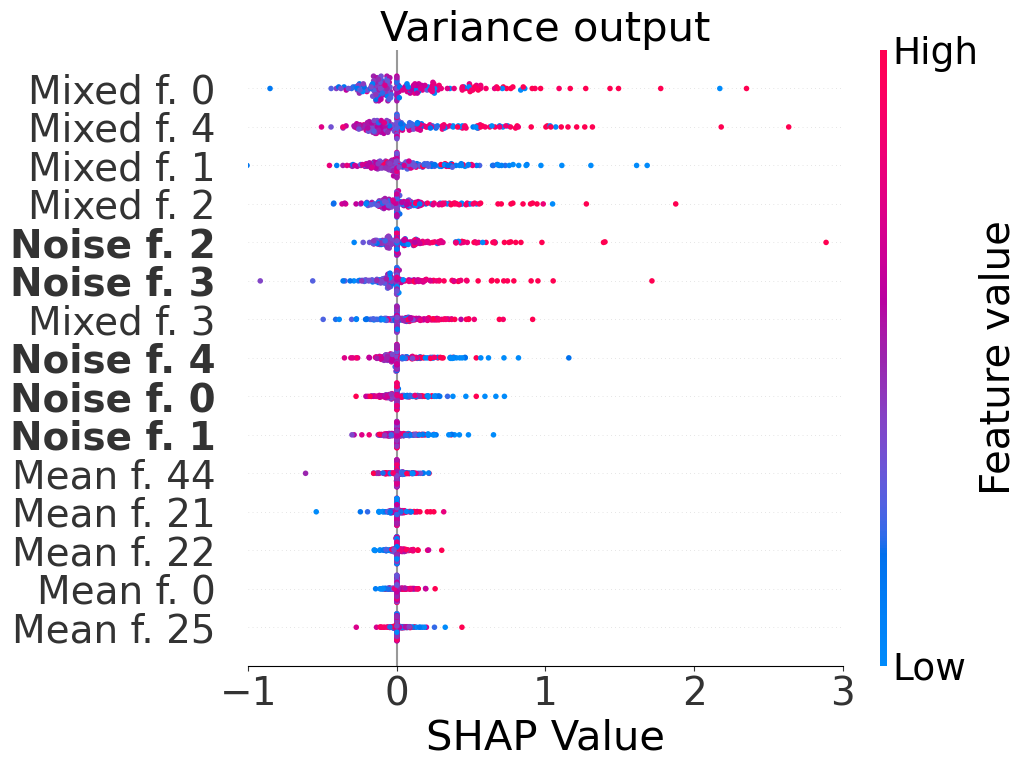

In [18]:
shapley_values = load_importances(method="VarX", identifier=identifier, save_dir=save_dir, uncertainty_ind="highU", i=0)["importance_directed"]
figure_save_dir = ""
import shap
from matplotlib import pyplot as plt

#plt.rcParams["font.family"] = "Arial"
var_names =  [f"Mean f. {i}" for i in range(70)] + [
            f"Noise f. {i}" for i in range(5)
        ] + [f"Mixed f. {i}" for i in range(5)]
data = np.load(f"{save_dir}data_{identifier}.npz")
x_test = data["x_test"]
test_output = pd.read_csv(f"{save_dir}models/pnn_{identifier}/pnn_test_output.csv").to_dict("list")
#shap.summary_plot(shapley_values, var_names, plot_type="bar")

top = len(shapley_values)
top_uncertainty_ind = np.argsort(test_output["sigma_test"])[-top:]
top_uncertainty_instances = x_test[top_uncertainty_ind]



shap.summary_plot(shapley_values,top_uncertainty_instances, var_names, plot_type="dot", max_display=15, show=False, plot_size=[9,7])
fig, ax = plt.gcf(), plt.gca()

# Get colorbar
cb_ax = fig.axes[1] 
add = 10
# Modifying color bar parameters
cb_ax.tick_params(labelsize=17+add)
cb_ax.set_ylabel("Feature value", fontsize=19+add)
# set the xlim
plt.xlim(-1, 3)

label_ax = fig.axes[0]
label_ax.tick_params(labelsize=18+add)
ax.set_xlabel("SHAP Value", fontsize=20+add)

# Make x ticks beginning with "noise" bold
for tick_label in ax.get_yticklabels():
    if tick_label.get_text().startswith("Noise"):
        tick_label.set_fontweight("bold")
        
plt.title("Variance output", fontsize=20+add)

#plt.savefig(f"{figure_save_dir}/shap_randomU.png", dpi=800, bbox_inches='tight')
#plt.savefig(f"{figure_save_dir}/shap_randomU.pdf", format='pdf', bbox_inches='tight')


In [19]:


def load_importances(method: str, identifier: str, save_dir: str, uncertainty_ind: str = None, i: int = 0):
    
    uncertainty_ind = f"_{uncertainty_ind}"
    importance = np.load(f"{save_dir}importances/{method}_importances_{identifier}_run_{i}{uncertainty_ind}.npy", allow_pickle=True).item()
    print(importance.keys())
    imp_directed_id = "importances_directed"
    return {"importance_directed": importance[imp_directed_id],
             "importance": importance["feature_importance"],
             "var_names": importance["var_names"]} 
    


dict_keys(['importances_directed', 'feature_importance', 'var_names', 'instances_to_explain'])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(0.5, 1.0, 'Mean output')

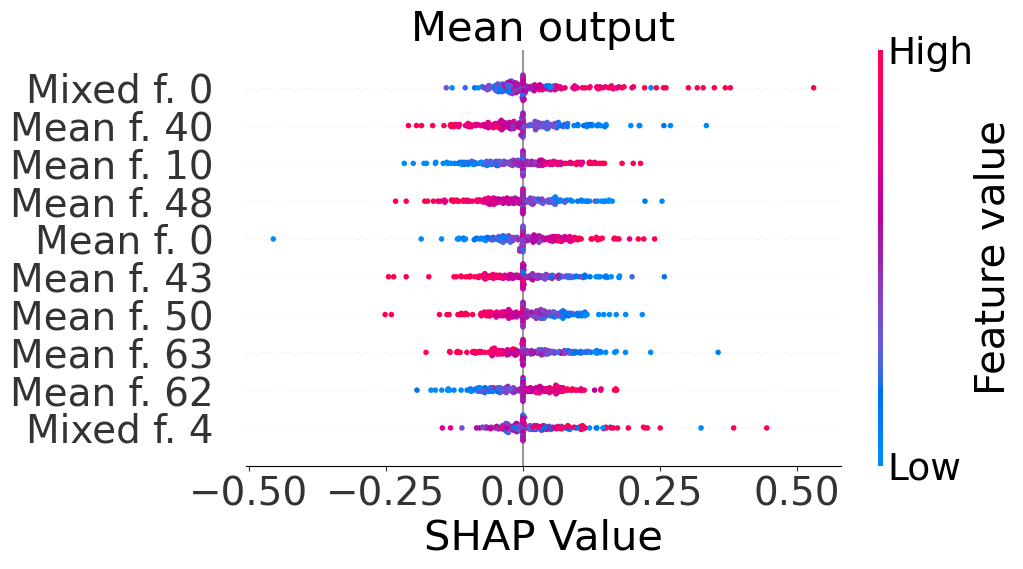

In [20]:
shapley_values = load_importances(method="mean", identifier=identifier, save_dir=save_dir, uncertainty_ind="highU", i=0)["importance_directed"]
import shap
from matplotlib import pyplot as plt

#plt.rcParams["font.family"] = "Arial"

data = np.load(f"{save_dir}data_{identifier}.npz")
x_test = data["x_test"]
test_output = pd.read_csv(f"{save_dir}models/pnn_{identifier}/pnn_test_output.csv").to_dict("list")
#shap.summary_plot(shapley_values, var_names, plot_type="bar")

top = len(shapley_values)
top_uncertainty_ind = np.argsort(test_output["sigma_test"])[-top:]
top_uncertainty_instances = x_test[top_uncertainty_ind]

add=10

shap.summary_plot(shapley_values,top_uncertainty_instances, var_names, plot_type="dot", max_display=10, show=False, plot_size=[9,5])
fig, ax = plt.gcf(), plt.gca()

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=17+add)
cb_ax.set_ylabel("Feature value", fontsize=19+add)

label_ax = fig.axes[0]
label_ax.tick_params(labelsize=18+add)
ax.set_xlabel("SHAP Value", fontsize=20+add)

# Make x ticks beginning with "noise" bold
for tick_label in ax.get_yticklabels():
    if tick_label.get_text().startswith("Noise"):
        tick_label.set_fontweight("bold")
        
plt.title("Mean output", fontsize=20+add)
#plt.savefig(f"{figure_save_dir}/shap_randomU_mean.png", dpi=800, bbox_inches='tight')
#plt.savefig(f"{figure_save_dir}/shap_randomU_mean.pdf", format='pdf', bbox_inches='tight')
